In [1]:
# notebooks/01_exploration_dataset.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset brut
column_names = ['unit', 'cycle',
                'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
               [f'sensor_{i}' for i in range(1, 22)]

df = pd.read_csv('../data/raw/train_FD001.txt', sep=' ', header=None)
df.drop(columns=[26, 27], inplace=True)  # Colonnes vides
df.columns = column_names

# Aperçu du jeu de données
print("Dimensions :", df.shape)
df.head()


Dimensions : (20631, 26)


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


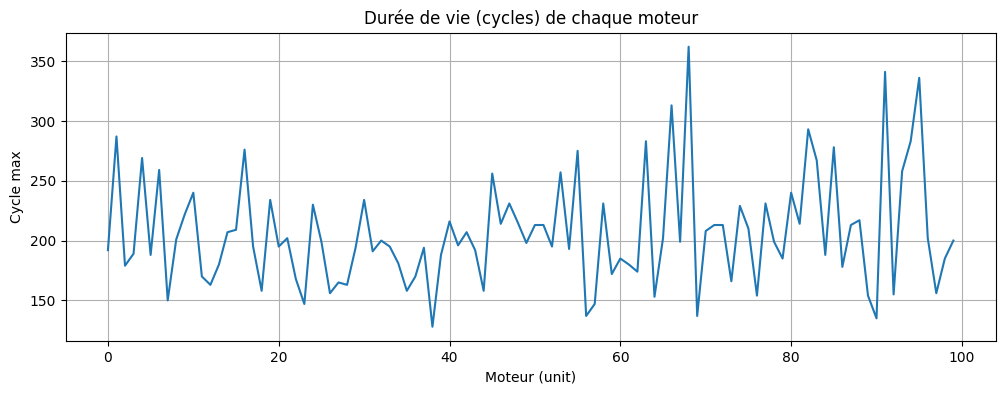

In [2]:
# Nombre de cycles par moteur
cycle_counts = df.groupby('unit')['cycle'].max()

plt.figure(figsize=(12, 4))
plt.plot(cycle_counts.values)
plt.title("Durée de vie (cycles) de chaque moteur")
plt.xlabel("Moteur (unit)")
plt.ylabel("Cycle max")
plt.grid(True)
plt.show()


In [3]:
import pandas as pd

# Charger le dataset (adapter le chemin si besoin)
df = pd.read_csv('../data/raw/train_FD001.txt', sep=' ', header=None)
df = df.drop(columns=[26, 27])  # Suppression des deux dernières colonnes vides

# Définir les colonnes manuellement
columns = ['unit', 'cycle'] + [f'op_setting_{i}' for i in range(1, 4)] + [f'sensor_{i}' for i in range(1, 22)]
df.columns = columns

# Afficher les 5 premières lignes
df.head()


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# Nombre total de moteurs
print("Nombre de moteurs :", df['unit'].nunique())

# Nombre moyen de cycles par moteur
print("Nombre moyen de cycles par moteur :", df.groupby('unit')['cycle'].max().mean())

# Capteurs avec peu de variation (à visualiser)
df.describe().T


Nombre de moteurs : 100
Nombre moyen de cycles par moteur : 206.31


,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


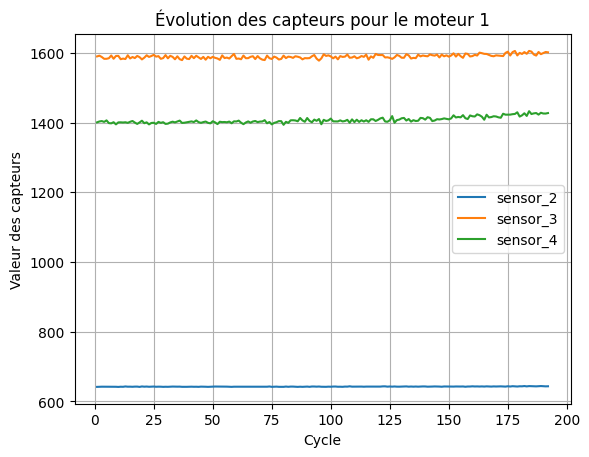

In [5]:
import matplotlib.pyplot as plt

# Exemple de visualisation : RUL d’un moteur
df[df['unit'] == 1][['cycle', 'sensor_2', 'sensor_3', 'sensor_4']].set_index('cycle').plot()
plt.title("Évolution des capteurs pour le moteur 1")
plt.xlabel("Cycle")
plt.ylabel("Valeur des capteurs")
plt.grid()
plt.show()
